Shopper Segmentations
--

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
contribution_file = '20190818_Contribution_Scores.csv'
dict_tier = {2:'35', 3:'63', 4:'180', 5:'365', 6:'730', 7:'1095', 8:'1460', 9: '>1460'}

In [3]:
contributions = pd.read_csv(contribution_file)

# Impute NA
contributions.fillna(value={'total_mpi':1.75, 't30_reliability_incidents':1.0}, inplace=True)

# There is data issue. total_mpi = 0.
contributions.loc[contributions['total_mpi'] ==0, 'total_mpi'] = 1.75

In [4]:
contributions.head(3)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier
0,89,0.324131,1.498786,40.0,8.0,2393.0,9
1,100,0.502313,1.615009,16.0,2.0,2382.0,9
2,135,0.517443,0.899161,60.0,1.0,2322.0,9


In [5]:
# Tenure Days <= 7 are excluded.
sorted(contributions.tenure_tier.unique().tolist())

[2, 3, 4, 5, 6, 7, 8, 9]

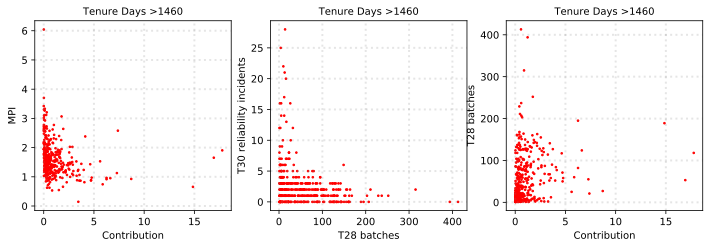

In [6]:
tier_no = 9
x1 = contributions[contributions['tenure_tier'] == tier_no]['contribution_normed']
y1 = contributions[contributions['tenure_tier'] == tier_no]['total_mpi']

x2 = contributions[contributions['tenure_tier'] == tier_no]['t28_batches']
y2 = contributions[contributions['tenure_tier'] == tier_no]['t30_reliability_incidents']

x3 = contributions[contributions['tenure_tier'] == tier_no]['contribution_normed']
y3 = contributions[contributions['tenure_tier'] == tier_no]['t28_batches']

fig = plt.figure(figsize=(12, 3.5))
ax1 = fig.add_subplot(131)
ax1.scatter(x1, y1, color='#ff0000', s=3)
ax1.set_xlabel('Contribution',fontsize=10)
ax1.set_ylabel('MPI',fontsize=10)
ax1.set_title('Tenure Days ' + dict_tier[tier_no], fontsize=10)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.2)

ax2 = fig.add_subplot(132)
ax2.scatter(x2, y2, color='#ff0000', s=3)
ax2.set_xlabel('T28 batches',fontsize=10)
ax2.set_ylabel('T30 reliability incidents',fontsize=10)
ax2.set_title('Tenure Days ' + dict_tier[tier_no], fontsize=10)
ax2.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.2)

ax3 = fig.add_subplot(133)
ax3.scatter(x3, y3, color='#ff0000', s=3)
ax3.set_xlabel('Contribution',fontsize=10)
ax3.set_ylabel('T28 batches',fontsize=10)
ax3.set_title('Tenure Days ' + dict_tier[tier_no], fontsize=10)
ax3.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.2)

plt.show()

In [7]:
contributions['contribution_tier'] = contributions['contribution_normed']\
                                                  .map(lambda x: 1 if x <= 0.02 else
                                                                 2 if x <= 0.05 else
                                                                 3 if x <= 0.1 else
                                                                 4 if x <= 0.2 else
                                                                 5 if x <= 0.5 else
                                                                 6 if x <= 1.0 else
                                                                 7 if x <= 2.0 else
                                                                 8 if x <= 5.0 else
                                                                 9 if x <= 10.0 else
                                                                 10)

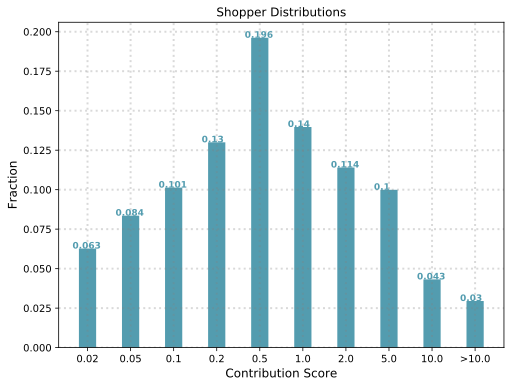

In [8]:
ind_width = 0.4

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
contribution_tier = contributions[['contribution_tier', 'shopper_id']]\
    .groupby('contribution_tier').count().reset_index()\
    .rename(columns={'shopper_id':'shopper_count'})
tot_shopper = len(contributions)
y = [i / float(tot_shopper) for i in contribution_tier['shopper_count'].tolist()][:10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.bar(x, y, align='center', color='#539caf', width=ind_width)
ax1.set_xlabel('Contribution Score',fontsize=12)
ax1.set_ylabel('Fraction',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.set_xticks(x)
ax1.set_xticklabels(('0.02', '0.05', '0.1', '0.2',
                     '0.5', '1.0', '2.0', '5.0', '10.0',
                    '>10.0'))
for i, v in enumerate(y):
    ax1.text(i + 0.65, v, str(round(v, 3)), color='#539caf', fontweight='bold', fontsize=9)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [9]:
contributions['mpi_tier'] = contributions['total_mpi']\
                                .map(lambda x: 1 if x <= 1.2 else
                                               2 if x <= 1.4 else
                                               3 if x <= 1.6 else
                                               4 if x <= 1.8 else
                                               5 if x <= 2.0 else
                                               6 if x <= 2.4 else
                                               7 if x <= 2.8 else
                                               8)

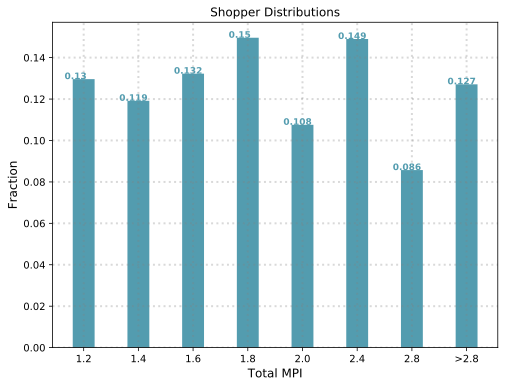

In [10]:
ind_width = 0.4

x = [1, 2, 3, 4, 5, 6, 7, 8]
contribution_tier = contributions[['mpi_tier', 'shopper_id']]\
    .groupby('mpi_tier').count().reset_index()\
    .rename(columns={'shopper_id':'shopper_count'})
tot_shopper = len(contributions)
y = [i / float(tot_shopper) for i in contribution_tier['shopper_count'].tolist()][:10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.bar(x, y, align='center', color='#539caf', width=ind_width)
ax1.set_xlabel('Total MPI',fontsize=12)
ax1.set_ylabel('Fraction',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.set_xticks(x)
ax1.set_xticklabels(('1.2', '1.4', '1.6', '1.8',
                     '2.0', '2.4', '2.8', '>2.8'))
for i, v in enumerate(y):
    ax1.text(i + 0.65, v, str(round(v, 3)), color='#539caf', fontweight='bold', fontsize=9)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [11]:
contributions['batch_tier'] = contributions['t28_batches']\
                                .map(lambda x: 1 if x <= 2 else
                                               2 if x <= 5 else
                                               3 if x <= 10 else
                                               4 if x <= 20 else
                                               5 if x <= 50 else
                                               6 if x <= 100 else
                                               7)

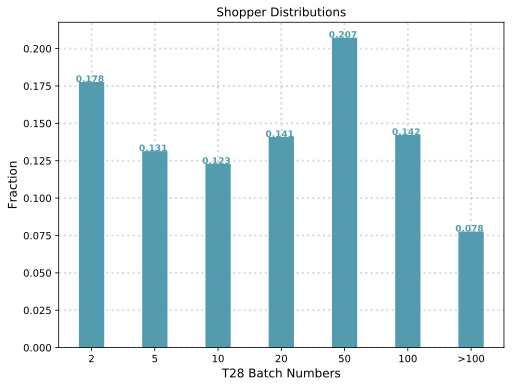

In [12]:
ind_width = 0.4

x = [1, 2, 3, 4, 5, 6, 7]
contribution_tier = contributions[['batch_tier', 'shopper_id']]\
    .groupby('batch_tier').count().reset_index()\
    .rename(columns={'shopper_id':'shopper_count'})
tot_shopper = len(contributions)
y = [i / float(tot_shopper) for i in contribution_tier['shopper_count'].tolist()][:10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.bar(x, y, align='center', color='#539caf', width=ind_width)
ax1.set_xlabel('T28 Batch Numbers',fontsize=12)
ax1.set_ylabel('Fraction',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.set_xticks(x)
ax1.set_xticklabels(('2', '5', '10', '20',
                     '50', '100', '>100'))
for i, v in enumerate(y):
    ax1.text(i + 0.75, v, str(round(v, 3)), color='#539caf', fontweight='bold', fontsize=9)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [13]:
contributions['incident_tier'] = contributions['t30_reliability_incidents']\
                                .map(lambda x: 1 if x == 0 else
                                               2 if x == 1 else
                                               3 if x == 2 else
                                               4 if x == 3 else
                                               5 if x == 4 else
                                               6 if x == 5 else
                                               7 if x == 6 else
                                               8 if x == 7 else
                                               9 if x == 8 else
                                               10)

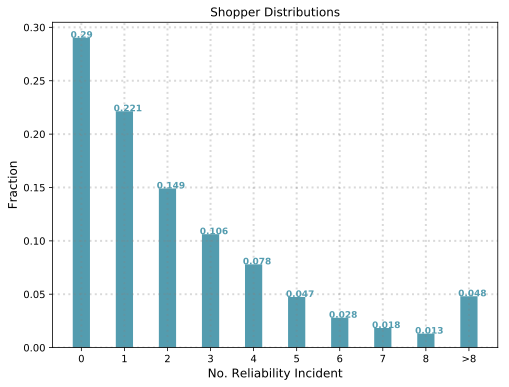

In [14]:
ind_width = 0.4

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
contribution_tier = contributions[['incident_tier', 'shopper_id']]\
    .groupby('incident_tier').count().reset_index()\
    .rename(columns={'shopper_id':'shopper_count'})
tot_shopper = len(contributions)
y = [i / float(tot_shopper) for i in contribution_tier['shopper_count'].tolist()][:10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.bar(x, y, align='center', color='#539caf', width=ind_width)
ax1.set_xlabel('No. Reliability Incident',fontsize=12)
ax1.set_ylabel('Fraction',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.set_xticks(x)
ax1.set_xticklabels(('0', '1', '2', '3',
                     '4', '5', '6', '7',
                     '8', '>8'))
for i, v in enumerate(y):
    ax1.text(i + 0.75, v, str(round(v, 3)), color='#539caf', fontweight='bold', fontsize=9)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [15]:
contributions.head(3)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,incident_tier
0,89,0.324131,1.498786,40.0,8.0,2393.0,9,5,3,5,9
1,100,0.502313,1.615009,16.0,2.0,2382.0,9,6,4,4,3
2,135,0.517443,0.899161,60.0,1.0,2322.0,9,6,1,6,2


### MVP Features

  - contribution_factor=contribution_tier. 
    - The larger the contributioin_tier, the better the shopper.
  - mpi_factor=9 - mpi_tier
    - The larger the mpi_tier, the worse a shopper.
  - batch_factor=batch_tier
    - The larger the batch_tier, the better a shopper.
  - incident_factor=11 - indicent_tier
    - The larger the incident_tier, the worse.

In [16]:
contributions['contribution_factor'] = contributions['contribution_tier']
contributions['mpi_factor'] = 9 - contributions['mpi_tier']
contributions['batch_factor'] = contributions['batch_tier']
contributions['incident_factor'] = 11 - contributions['incident_tier']

In [17]:
contributions['mvp_score'] = contributions['contribution_factor']\
                            * contributions['mpi_factor']\
                            * contributions['batch_factor']\
                            * contributions['incident_factor']

contributions['mvp_score2'] = contributions['contribution_factor']\
                            + contributions['mpi_factor']\
                            + contributions['batch_factor']\
                            + contributions['incident_factor']

### MVP Distribution

In [18]:
if False:
    x = contributions['tenure']
    y = contributions['mvp_score']

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, y, color='#ff0000', s=2)
    ax1.set_xlabel('Tenure Days',fontsize=12)
    ax1.set_ylabel('MVP Score',fontsize=12)
    ax1.set_title('MVP Distribution')
    ax1.set_xlim([7, 1095])
    ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.2)
    plt.show()

In [19]:
# Quantile numbers.

contributions.mvp_score.quantile(q=0.9)

2520.0

In [20]:
contributions['mvp_tier'] = contributions['mvp_score']\
                                .map(lambda x: 1 if x <= 40.0 else
                                               2 if x <= 100.0 else
                                               3 if x <= 192.0 else
                                               4 if x <= 336.0 else
                                               5 if x <= 540.0 else
                                               6 if x <= 810.0 else
                                               7 if x <= 1200.0 else
                                               8 if x <= 1680.0 else
                                               9 if x <= 2520.0 else
                                               10)

In [21]:
contributions.head(3)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,incident_tier,contribution_factor,mpi_factor,batch_factor,incident_factor,mvp_score,mvp_score2,mvp_tier
0,89,0.324131,1.498786,40.0,8.0,2393.0,9,5,3,5,9,5,6,5,2,300,18,4
1,100,0.502313,1.615009,16.0,2.0,2382.0,9,6,4,4,3,6,5,4,8,960,23,7
2,135,0.517443,0.899161,60.0,1.0,2322.0,9,6,1,6,2,6,8,6,9,2592,29,10


In [22]:
segments = contributions[['shopper_id', 'tenure_tier', 'mvp_tier']]\
    .groupby(['tenure_tier', 'mvp_tier']).count().reset_index()\
    .rename(columns={'shopper_id':'count'})

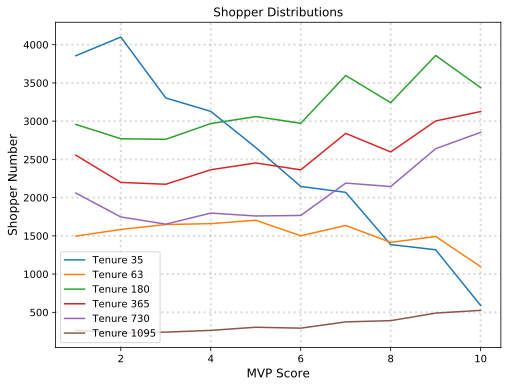

In [23]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
for i in range(2, 8):
    ax1.plot(x, segments[segments['tenure_tier'] == i]['count'], label='Tenure ' + dict_tier[i])
ax1.set_xlabel('MVP Score',fontsize=12)
ax1.set_ylabel('Shopper Number',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.legend(loc='lower left')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [24]:
contributions['mvp_tier2'] = contributions['mvp_score2']\
                                .map(lambda x: 1 if x <= 12 else
                                               2 if x <= 14 else
                                               3 if x <= 16 else
                                               4 if x <= 18 else
                                               5 if x <= 20 else
                                               6 if x <= 22 else
                                               7 if x <= 24 else
                                               8 if x <= 26 else
                                               9 if x <= 28 else
                                               10)

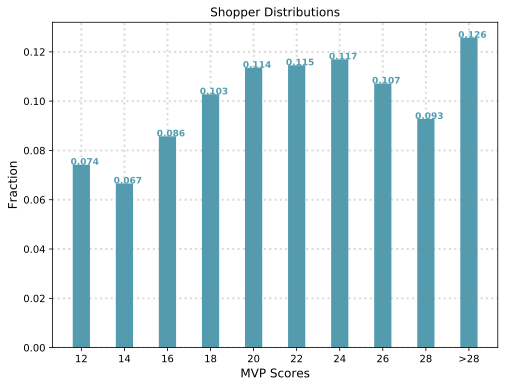

In [25]:
ind_width = 0.4

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score_tier = contributions[['mvp_tier2', 'shopper_id']]\
    .groupby('mvp_tier2').count().reset_index()\
    .rename(columns={'shopper_id':'shopper_count'})
tot_shopper = len(contributions)
y = [i / float(tot_shopper) for i in score_tier['shopper_count'].tolist()][:10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.bar(x, y, align='center', color='#539caf', width=ind_width)
ax1.set_xlabel('MVP Scores',fontsize=12)
ax1.set_ylabel('Fraction',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.set_xticks(x)
ax1.set_xticklabels(('12', '14', '16', '18',
                     '20', '22', '24', '26',
                     '28', '>28'))
for i, v in enumerate(y):
    ax1.text(i + 0.75, v, str(round(v, 3)), color='#539caf', fontweight='bold', fontsize=9)
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

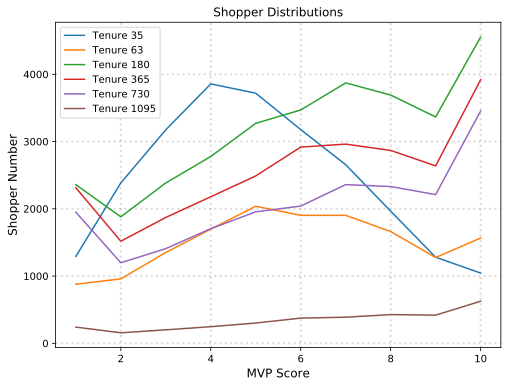

In [26]:
segments2 = contributions[['shopper_id', 'tenure_tier', 'mvp_tier2']]\
    .groupby(['tenure_tier', 'mvp_tier2']).count().reset_index()\
    .rename(columns={'shopper_id':'count'})

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
for i in range(2, 8):
    ax1.plot(x, segments2[segments2['tenure_tier'] == i]['count'], label='Tenure ' + dict_tier[i])
ax1.set_xlabel('MVP Score',fontsize=12)
ax1.set_ylabel('Shopper Number',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.legend(loc='upper left')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [27]:
contributions['mvp_score3'] = contributions['contribution_normed']\
                        * contributions['t28_batches']\
                        / contributions['total_mpi']\
                        / (contributions['t30_reliability_incidents'] + 1)

In [28]:
contributions['mvp_score3'].quantile(q=0.9)

61.96665369932731

In [29]:
contributions['mvp_score3'].max()

24418.862268464618

In [30]:
contributions['mvp_tier3'] = contributions['mvp_score3']\
                                .map(lambda x: 1 if x <= 0.014 else
                                               2 if x <= 0.059 else
                                               3 if x <= 0.18 else
                                               4 if x <= 0.47 else
                                               5 if x <= 1.13 else
                                               6 if x <= 2.67 else
                                               7 if x <= 6.30 else
                                               8 if x <= 16.60 else
                                               9 if x <= 55.20 else
                                               10)

segments3 = contributions[['shopper_id', 'tenure_tier', 'mvp_tier3']]\
    .groupby(['tenure_tier', 'mvp_tier3']).count().reset_index()\
    .rename(columns={'shopper_id':'count'})

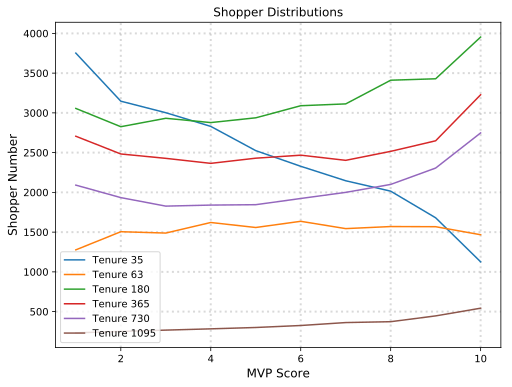

In [31]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
for i in range(2, 8):
    ax1.plot(x, segments3[segments3['tenure_tier'] == i]['count'], label='Tenure ' + dict_tier[i])
ax1.set_xlabel('MVP Score',fontsize=12)
ax1.set_ylabel('Shopper Number',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.legend(loc='lower left')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [32]:
contributions['mvp_score4'] = contributions['contribution_normed']\
                        * contributions['t28_batches']\
                        / (contributions['total_mpi'] + 1)\
                        / (contributions['t30_reliability_incidents'] + 1)

In [33]:
contributions['mvp_score4'].quantile(q=0.9)

35.34472088750894

In [34]:
contributions['mvp_score4'].max()

4427.6872981519291

In [35]:
contributions['mvp_tier4'] = contributions['mvp_score4']\
                                .map(lambda x: 1 if x <= 0.01 else
                                               2 if x <= 0.04 else
                                               3 if x <= 0.12 else
                                               4 if x <= 0.30 else
                                               5 if x <= 0.72 else
                                               6 if x <= 1.65 else
                                               7 if x <= 3.82 else
                                               8 if x <= 9.78 else
                                               9 if x <= 31.23 else
                                               10)

segments4 = contributions[['shopper_id', 'tenure_tier', 'mvp_tier4']]\
    .groupby(['tenure_tier', 'mvp_tier4']).count().reset_index()\
    .rename(columns={'shopper_id':'count'})

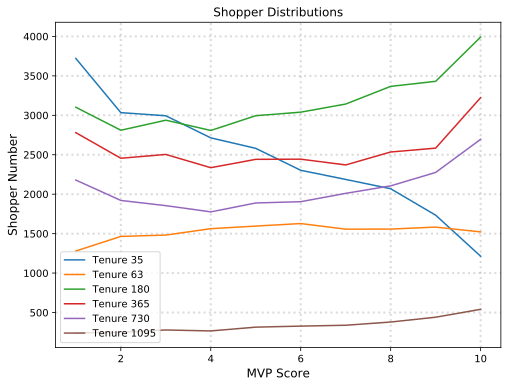

In [36]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
for i in range(2, 8):
    ax1.plot(x, segments4[segments4['tenure_tier'] == i]['count'], label='Tenure ' + dict_tier[i])
ax1.set_xlabel('MVP Score',fontsize=12)
ax1.set_ylabel('Shopper Number',fontsize=12)
ax1.set_title('Shopper Distributions')
ax1.legend(loc='lower left')
ax1.grid(True, color='grey', linestyle=':', linewidth=2, alpha=0.3)

plt.show()

In [37]:
contributions[(contributions['tenure_tier'] == 9)\
             & (contributions['mvp_tier4'] == 1)].head(5)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,...,batch_factor,incident_factor,mvp_score,mvp_score2,mvp_tier,mvp_tier2,mvp_score3,mvp_tier3,mvp_score4,mvp_tier4
39,2573,0.054341,1.653612,4.0,25.0,1897.0,9,3,4,2,...,2,1,30,11,1,1,0.005056,1,0.003151,1
51,3087,0.020057,1.750000,1.0,0.0,1869.0,9,2,4,1,...,1,10,100,18,2,4,0.011461,1,0.007293,1
77,4367,0.009729,6.042754,4.0,0.0,1807.0,9,1,8,2,...,2,10,20,14,1,2,0.006440,1,0.005526,1
98,5534,0.081329,1.214699,1.0,3.0,1792.0,9,3,2,1,...,1,7,147,18,3,4,0.016738,2,0.009181,1
131,7321,0.006002,1.942903,2.0,1.0,1759.0,9,1,5,1,...,1,9,36,15,1,3,0.003089,1,0.002040,1


In [38]:
contributions[(contributions['tenure_tier'] == 9)\
             & (contributions['mvp_tier4'] == 10)].head(5)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,...,batch_factor,incident_factor,mvp_score,mvp_score2,mvp_tier,mvp_tier2,mvp_score3,mvp_tier3,mvp_score4,mvp_tier4
14,1216,2.304876,1.401255,103.0,1.0,1997.0,9,8,3,7,...,7,9,3024,30,10,10,84.710569,10,49.432943,10
16,1383,2.634210,0.996925,123.0,3.0,1977.0,9,8,1,7,...,7,7,3136,30,10,10,81.251838,10,40.563353,10
22,1864,6.253315,0.964465,195.0,0.0,1946.0,9,9,1,7,...,7,10,5040,34,10,10,1264.323621,10,620.726836,10
26,2087,16.933947,1.653861,53.0,1.0,1926.0,9,10,4,6,...,6,9,2700,30,10,10,271.334546,10,169.093110,10
33,2392,1.232920,1.192275,394.0,0.0,1882.0,9,7,1,7,...,7,10,3920,32,10,10,407.431548,10,221.582819,10


In [39]:
contributions[(contributions['tenure_tier'] == 4)\
             & (contributions['mvp_tier4'] == 1)].head(5)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,...,batch_factor,incident_factor,mvp_score,mvp_score2,mvp_tier,mvp_tier2,mvp_score3,mvp_tier3,mvp_score4,mvp_tier4
870,72243,0.044191,2.155904,1.0,26.0,152.0,4,2,6,1,...,1,1,6,7,1,1,0.000759,1,0.000519,1
1020,94460,0.023105,1.581917,1.0,1.0,85.0,4,2,3,1,...,1,9,108,18,3,4,0.007303,1,0.004474,1
1190,117604,0.032003,2.964655,1.0,1.0,138.0,4,2,8,1,...,1,9,18,13,1,2,0.005397,1,0.004036,1
1273,125481,0.332820,3.062591,3.0,24.0,154.0,4,5,8,2,...,2,1,10,9,1,1,0.013041,1,0.009831,1
1283,126652,0.076984,2.972289,3.0,7.0,78.0,4,3,8,2,...,2,3,18,9,1,1,0.009713,1,0.007268,1


In [40]:
contributions[(contributions['tenure_tier'] == 4)\
             & (contributions['mvp_tier4'] == 10)].head(5)

,shopper_id,contribution_normed,total_mpi,t28_batches,t30_reliability_incidents,tenure,tenure_tier,contribution_tier,mpi_tier,batch_tier,...,batch_factor,incident_factor,mvp_score,mvp_score2,mvp_tier,mvp_tier2,mvp_score3,mvp_tier3,mvp_score4,mvp_tier4
405,38319,2.415055,1.445552,96.0,0.0,139.0,4,8,3,6,...,6,10,2880,30,10,10,160.385326,10,94.802852,10
888,73874,4.651516,1.070282,140.0,0.0,69.0,4,8,1,7,...,7,10,4480,33,10,10,608.449376,10,314.552484,10
1157,113970,0.643416,1.283285,264.0,1.0,89.0,4,6,2,7,...,7,9,2646,29,10,10,66.182383,10,37.196787,10
1370,135465,2.097160,1.319512,161.0,0.0,91.0,4,8,2,7,...,7,10,3920,32,10,10,255.884532,10,145.566280,10
1444,142394,0.572682,0.876049,332.0,1.0,68.0,4,6,1,7,...,7,9,3024,30,10,10,108.516000,10,50.673148,10
